In [1]:
# import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Read the file using pandas and replacing all the missing values with '?'

In [4]:
df = pd.read_csv("C:/Users/saurabh/Desktop/Kaggle/googleAd/advertising_train.csv", na_values=['?'])

In [5]:
df.columns

Index(['case_id', 'companyId', 'countryId', 'deviceType', 'day', 'dow',
       'price1', 'price2', 'price3', 'ad_area', 'ad_ratio', 'requests',
       'impression', 'cpc', 'ctr', 'viewability', 'ratio1', 'ratio2', 'ratio3',
       'ratio4', 'ratio5', 'y'],
      dtype='object')

In [6]:
# display the top 5 rows of the dataset

In [7]:
df.head()

,case_id,companyId,countryId,deviceType,day,dow,price1,price2,price3,ad_area,...,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5,y
0,1,95,234,1,1,Saturday,0.11,0.30,0.6000,7.5000,...,4350,0.6291,0.0011,0.0557,0.8630,0.4811,0.0646,0.3097,0.6257,0.250111
1,2,43,57,2,1,Saturday,0.00,0.00,0.0000,24.2500,...,1023,0.1887,0.0039,0.4495,1.0000,0.6109,1.0000,0.0000,0.0000,0.816571
2,3,43,57,2,1,Saturday,0.78,1.10,2.1786,24.2500,...,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.035484
3,4,43,57,2,1,Saturday,0.78,1.10,2.1786,24.2500,...,1038,0.5028,0.0019,0.1883,0.6474,0.9595,1.0000,0.0000,0.0000,0.351807
4,5,43,29,2,1,Saturday,4.56,4.56,4.5626,0.0001,...,27,0.0093,0.4444,0.8750,1.0000,1.0000,1.0000,0.0000,0.0000,0.067901


In [8]:
df.isnull().sum()

case_id        0
companyId      0
countryId      0
deviceType     0
day            0
dow            0
price1         0
price2         0
price3         0
ad_area        0
ad_ratio       0
requests       0
impression     0
cpc            0
ctr            0
viewability    0
ratio1         0
ratio2         0
ratio3         0
ratio4         0
ratio5         0
y              0
dtype: int64

fig, ax = plt.subplots(figsize=(5, 8))
sns.countplot(df['y'])
plt.title('Target values')

In [9]:
# Show all the statistical measures of the data set using describe function

In [10]:
df.describe()

,case_id,companyId,countryId,deviceType,day,price1,price2,price3,ad_area,ad_ratio,...,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5,y
count,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,...,2.141280e+05,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000
mean,107064.500000,73.332988,119.496180,1.875612,15.790522,0.438229,0.630178,0.932436,4.724445,0.923402,...,5.585714e+03,0.177862,0.032921,0.377929,0.558284,0.491079,0.311646,0.131008,0.188300,0.847004
std,61813.573558,47.817556,76.129206,0.787796,8.385557,1.281403,1.481552,1.839991,6.273410,0.482055,...,9.871334e+04,0.707260,0.092502,0.365938,0.446955,0.414312,0.444088,0.239758,0.297121,1.390593
min,1.000000,40.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000100,0.083330,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098
25%,53532.750000,43.000000,56.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000100,0.833330,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150415
50%,107064.500000,43.000000,102.000000,2.000000,16.000000,0.010000,0.090000,0.294800,0.000100,1.000000,...,9.900000e+01,0.015700,0.001700,0.331500,0.750000,0.627100,0.027600,0.000000,0.000000,0.419000
75%,160596.250000,95.000000,197.000000,2.000000,23.000000,0.190000,0.570000,0.985650,7.500000,1.000000,...,1.058000e+03,0.125200,0.012000,0.715900,1.000000,0.895700,1.000000,0.163600,0.384700,0.959048
max,214128.000000,159.000000,251.000000,5.000000,30.000000,14.690000,63.120000,78.900000,36.000000,5.000000,...,6.100324e+06,132.533900,2.000000,7.000000,1.000000,1.027000,1.500000,1.076900,1.200000,47.060000


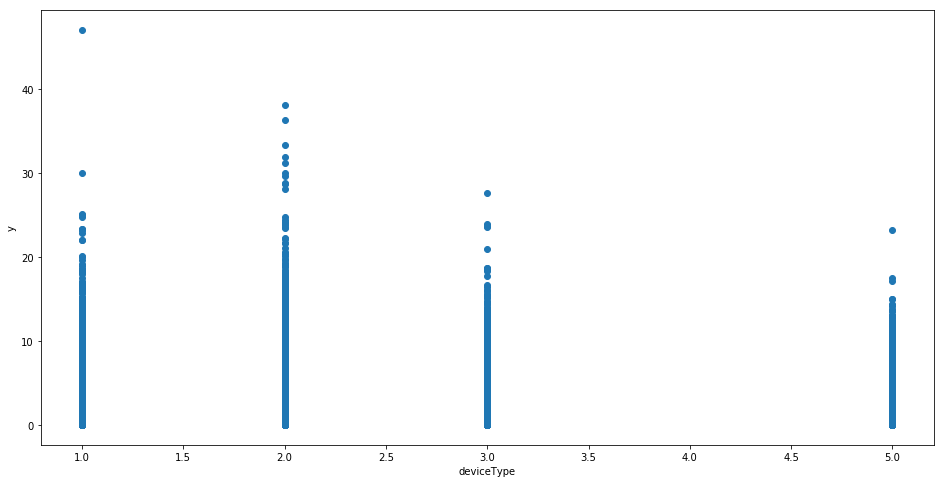

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['deviceType'], df['y'])
ax.set_xlabel('deviceType')
ax.set_ylabel('y')
plt.show()

In [12]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["y"], ascending = False, inplace = True)
print(corr.y)

Find most important features relative to target
y              1.000000
ctr            0.197221
price3         0.175244
price2         0.159668
viewability    0.158794
price1         0.128919
deviceType     0.102837
ratio1         0.072412
ratio3         0.069926
day            0.064433
case_id        0.064384
ratio4         0.042551
cpc            0.017002
ratio2         0.012939
impression    -0.024683
ad_ratio      -0.027756
requests      -0.029436
countryId     -0.032213
ad_area       -0.049349
ratio5        -0.063455
companyId     -0.160549
Name: y, dtype: float64


In [13]:
df.dtypes

case_id          int64
companyId        int64
countryId        int64
deviceType       int64
day              int64
dow             object
price1         float64
price2         float64
price3         float64
ad_area        float64
ad_ratio       float64
requests         int64
impression       int64
cpc            float64
ctr            float64
viewability    float64
ratio1         float64
ratio2         float64
ratio3         float64
ratio4         float64
ratio5         float64
y              float64
dtype: object

In [14]:
df["deviceType"] = df["deviceType"].astype('category')
df["day"] = df["day"].astype('category')
df["case_id"] = df["case_id"].astype('category')
df["countryId"] = df["countryId"].astype('category')
df["companyId"] = df["companyId"].astype('category')

In [15]:
df["deviceType"].count()

214128

In [16]:
df['IR_Ratio'] = df['impression']/df['requests']
#df.dropna(inplace = True)

In [17]:
df["deviceType"].count()

214128

In [18]:
df= df.drop([ 'case_id','companyId','countryId','day', 'dow', 'impression', 'requests', 'ad_area', 'ad_ratio', 'ratio5'], axis =1)


In [19]:
df["deviceType"].count()

214128

In [20]:
df.head()

,deviceType,price1,price2,price3,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,y,IR_Ratio
0,1,0.11,0.30,0.6000,0.6291,0.0011,0.0557,0.8630,0.4811,0.0646,0.3097,0.250111,0.411270
1,2,0.00,0.00,0.0000,0.1887,0.0039,0.4495,1.0000,0.6109,1.0000,0.0000,0.816571,1.000000
2,2,0.78,1.10,2.1786,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.035484,NaN
3,2,0.78,1.10,2.1786,0.5028,0.0019,0.1883,0.6474,0.9595,1.0000,0.0000,0.351807,0.208979
4,2,4.56,4.56,4.5626,0.0093,0.4444,0.8750,1.0000,1.0000,1.0000,0.0000,0.067901,0.018157


In [21]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_3.corr()
corr.sort_values(["y"], ascending = False, inplace = True)
print(corr.y)

Find most important features relative to target


NameError: name 'df_3' is not defined

In [22]:
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    f1 = u - 1.5*s
    f2 = u + 1.5*s
    filtered = np.where(data.between(f1,f2),data, data.median())
    return filtered

df['ctr'] = reject_outliers(df['ctr'])
df['price1'] = reject_outliers(df['price1'])
df['price2'] = reject_outliers(df['price2'])
df['price3'] = reject_outliers(df['price3'] )
df['viewability'] = reject_outliers(df['viewability'] )
df['ratio1'] = reject_outliers(df['ratio1'])
df['ratio2'] = reject_outliers(df['ratio2'])
df['ratio3'] = reject_outliers(df['ratio3'])
df['ratio4'] = reject_outliers(df['ratio4'])
df['y'] = reject_outliers(df['y'])
df['cpc'] = reject_outliers(df['cpc'])
df['IR_Ratio'] = reject_outliers(df['IR_Ratio'])
#df.dropna(inplace = True)
 

In [23]:
df.describe()

,price1,price2,price3,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,y,IR_Ratio
count,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000
mean,0.179764,0.306888,0.532105,0.101252,0.012863,0.319362,0.558284,0.491079,0.029459,0.049185,0.582308,0.817905
std,0.411170,0.519457,0.801491,0.197383,0.029352,0.311438,0.446955,0.414312,0.057809,0.112885,0.592761,0.152944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098,0.315611
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150415,0.836412
50%,0.010000,0.090000,0.294800,0.015700,0.001700,0.331500,0.750000,0.627100,0.027600,0.000000,0.419000,0.836412
75%,0.120000,0.400000,0.725700,0.103900,0.006700,0.594900,1.000000,0.895700,0.027600,0.000000,0.791423,0.915254
max,2.360000,2.850000,3.692400,1.238600,0.171600,0.926800,1.000000,1.027000,0.977500,0.490600,2.932812,1.000000


In [24]:
df.columns

Index(['deviceType', 'price1', 'price2', 'price3', 'cpc', 'ctr', 'viewability',
       'ratio1', 'ratio2', 'ratio3', 'ratio4', 'y', 'IR_Ratio'],
      dtype='object')

In [25]:
features=df[['deviceType', 'price1', 'price2', 'price3','cpc', 'ctr', 'viewability', 'ratio1', 'ratio2', 'ratio3', 'ratio4','IR_Ratio']].values
label=df[['y']].values

In [26]:
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
label_scaled = scaler.fit_transform(label)

In [27]:
#spliting the training and testing data, keeping 90% for testing and rest for training. I have futher splitted the train 
# data into validation and training data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, label_scaled, test_size = 0.05, random_state = 42) 

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=100):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestRegressor
        from numpy import argsort
        model_rfi = RandomForestRegressor(n_estimators=10)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [ ]:
# Random forest model, which calculates root mean squared error and mean absolute error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


rf_regressor = RandomForestRegressor(random_state=999)

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', rf_regressor)])

depths = np.arange(1, 10)



params_pipe_RF = {'rfi_fs__n_features_': [15],                  
                  'rf__max_depth': depths, 
                  'n_estimators':[400, 600, 800],
                   'rf__min_samples_split': [2,3,4,5,6]}
 


gs_pipe_RF  = GridSearchCV(estimator=pipe_RF, 
                           param_grid=params_pipe_RF, 
                           cv=5,
                           n_jobs=-1,
                           scoring= 'neg_mean_squared_error', 
                           verbose=1)

gs_pipe_RF.fit(x_train, y_train);

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [ ]:
gs_pipe_RF.best_params_

In [ ]:
gs_pipe_RF.best_score_

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results_dt = np.sqrt(-cross_val_score(gs_pipe_RF, feature_scaled, target, scoring='neg_mean_squared_error'))
print("RMSE: %0.2f (+/- %0.2f)" % (cv_results_rf.mean(), cv_results_rf.std() * 2))

In [ ]:
df_deploy = pd.read_csv("C:/Users/saurabh/Desktop/Kaggle/googleAd/advertising_test.csv", na_values=['?'])

In [ ]:
df_deploy.head()

In [ ]:
df_deploy.describe()

In [ ]:
df_deploy["deviceType"] = df_deploy["deviceType"].astype('category')
df_deploy["day"] = df_deploy["day"].astype('category')
df_deploy["countryId"] = df_deploy["countryId"].astype('category')
df_deploy["companyId"] = df_deploy["companyId"].astype('category')

In [ ]:
df_deploy['IR_Ratio'] = df_deploy['impression']/df_deploy['requests']

In [ ]:
df_deploy['ctr'] = reject_outliers(df_deploy['ctr'] )
df_deploy['price1'] = reject_outliers(df_deploy['price1'])
df_deploy['price2'] = reject_outliers(df_deploy['price2'])
df_deploy['price3'] = reject_outliers(df_deploy['price3'])
df_deploy['viewability'] = reject_outliers(df_deploy['viewability'])
df_deploy['ratio1'] = reject_outliers(df_deploy['ratio1'])
df_deploy['ratio2'] = reject_outliers(df_deploy['ratio2'])
df_deploy['ratio3'] = reject_outliers(df_deploy['ratio3'])
df_deploy['ratio4'] = reject_outliers(df_deploy['ratio4'])
df_deploy['cpc'] = reject_outliers(df_deploy['cpc'])
df_deploy['IR_Ratio'] = reject_outliers(df_deploy['IR_Ratio'])


In [ ]:
df_deploy.describe()

In [ ]:
features_df_deploy=df_deploy[['deviceType', 'price1', 'price2', 'price3','cpc', 'ctr', 'viewability', 'ratio1', 'ratio2', 'ratio3', 'ratio4','IR_Ratio']].values

In [ ]:
features_df_deploy.shape

In [ ]:
scaler = preprocessing.StandardScaler()
features_df_deploy_scaled = scaler.fit_transform(features_df_deploy)

In [ ]:
# In order to visually inspect the pridicted value for y, I have created a dataframe prediction_df
prediction_df = pd.DataFrame()
prediction = rf_predictor.predict(features_df_deploy_scaled)

In [ ]:
prediction_df['y'] = prediction
case_id = range(1, 1+len(prediction_df))
prediction_df.insert(0, "case_id", case_id, True) 
prediction_df.head(10)

In [ ]:
prediction_df.to_csv("C:/Users/saurabh/Desktop/prediction_google_ad.csv")

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

random_Regressor = rfr

parameters = {'bootstrap': [True, False],
              'max_features':['auto', 'sqrt', 'log2'],
              'n_estimators':[400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             }

random_grid = GridSearchCV(rfr, param_grid = parameters, scoring = 'accuracy', cv = 5)
random_grid.fit(x_train, y_train)

#random_grid

CV_random_Regressor.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

from skl# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))earn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) 

np.random.seed(1234)
test_size=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45, 0.50, 0.60, 0.70, 0.80,0.9]
for i in test_size:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = i, random_state = 2) 
    clf = RandomForestRegressor(n_estimators=1200,  max_depth=15,  min_samples_leaf=2, random_state=42)
    clf = clf.fit(x_train,y_train)
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    #clf.score (x_test, y_test)
    #y_pred = clf.predict(x_test)
    #error = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    #accuracy=clf.score(x_test,y_test)
    #print("error for test size",i,"is",error ) 
    print("testing error for test size: ",i, " " ,np.sqrt(mean_squared_error(y_test_pred, y_test)))
    print("training error for test size: ",i, " ",np.sqrt(mean_squared_error(y_train_pred, y_train)))
    print()

cv_scores = cross_val_score(clf, x_scaled, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

In [ ]:
# random forest

np.random.seed(1234)
clf = RandomForestRegressor(n_estimators=1200,  max_depth=15,  min_samples_leaf=2, random_state=42)
clf = clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
# test error
print("testing error: RMSE ",np.sqrt(mean_squared_error(y_test_pred, y_test)))
print("testing error: MAE ",(mean_absolute_error(y_test_pred, y_test)))
# training error
y_train_pred = clf.predict(x_train)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
print("training error: RMSE ",np.sqrt(mean_squared_error(y_train_pred, y_train)))
print("training error: MAE",(mean_absolute_error(y_train_pred, y_train)))

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

cv_scores = cross_val_score(clf, x, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

np.random.seed(1234)
clf = DecisionTreeRegressor()
clf = clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
# test error
print("test error: " ,np.sqrt(mean_squared_error(y_test_pred, y_test)))
# training error
y_train_pred = clf.predict(x_train)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
print("training error: " , np.sqrt(mean_squared_error(y_train_pred, y_train)))

np.random.seed(1234)
clf = RandomForestRegressor()
clf = clf.fit(x_train,y_train)
#clf.score (x_test,y_test)
y_train_pred = clf.predict(x_train)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
mean_squared_error(y_train_pred, y_train)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Load libraries
from sklearn.ensemble import AdaBoostRegressor
np.random.seed(1234)

# Create adaboost classifer object
abc =AdaBoostRegressor()

# Train Adaboost Classifer
model = abc.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
#np.sqrt(metrics.mean_squared_error(y_pred, y_test.values))
mean_squared_error(y_train_pred, y_train)
#model.score (x_test, y_test)

In [ ]:
#df_out = pd.merge(df,df[['prediction']],how = 'left',left_index = True, right_index = True)